<h2 style="text-align:center;">EDA for Hotel</h2>



In [61]:
import numpy as np
import pandas as pd

In [62]:
data = pd.read_csv("hotel_data_2.csv")

In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            800 non-null    int64  
 1   index                 800 non-null    int64  
 2   address               800 non-null    object 
 3   categories            800 non-null    object 
 4   city                  800 non-null    object 
 5   country               800 non-null    object 
 6   latitude              774 non-null    float64
 7   longitude             774 non-null    float64
 8   name                  800 non-null    object 
 9   postalCode            800 non-null    object 
 10  province              800 non-null    object 
 11  reviews.date          791 non-null    object 
 12  reviews.dateAdded     800 non-null    object 
 13  reviews.doRecommend   0 non-null      float64
 14  reviews.id            0 non-null      float64
 15  reviews.rating        7

In [64]:
data.describe()

,Unnamed: 0,index,latitude,longitude,reviews.doRecommend,reviews.id,reviews.rating
count,800.0000,800.0000,774.000000,774.000000,0.0,0.0,788.000000
mean,399.5000,1199.5000,39.509586,-72.245121,NaN,NaN,3.614213
std,231.0844,231.0844,5.851302,34.556947,NaN,NaN,1.382740
min,0.0000,800.0000,20.905720,-124.060700,NaN,NaN,0.000000
25%,199.7500,999.7500,36.651330,-92.629776,NaN,NaN,3.000000
50%,399.5000,1199.5000,38.961240,-81.023410,NaN,NaN,4.000000
75%,599.2500,1399.2500,42.786210,-75.984430,NaN,NaN,5.000000
max,799.0000,1599.0000,51.295746,6.557915,NaN,NaN,5.000000


<b><a>1. Take a first look at your data.</a></b>


From the given data description, we can infer that there are 21 columns in the dataset with a total of 800 rows.

<b>Categorical data</b> refers to data that can be divided into categories or groups. In this dataset, the categorical columns are 'address', 'categories', 'city', 'country', 'name', 'postalCode', 'province', 'reviews.date', 'reviews.dateAdded', 'reviews.text', 'reviews.title', 'reviews.userCity', and 'reviews.username'. These columns have non-numeric values.

<b>Numerical data</b> refers to data that has numeric values and can be measured quantitatively. In this dataset, the numerical columns are 'Unnamed: 0', 'index', 'latitude', 'longitude', 'reviews.id', and 'reviews.rating'. These columns have either integer or float values.

It's worth noting that the 'reviews.doRecommend' and 'reviews.id' columns have no non-null values, so they don't contain any meaningful data.

In [65]:
data.isnull().sum()

Unnamed: 0                0
index                     0
address                   0
categories                0
city                      0
country                   0
latitude                 26
longitude                26
name                      0
postalCode                0
province                  0
reviews.date              9
reviews.dateAdded         0
reviews.doRecommend     800
reviews.id              800
reviews.rating           12
reviews.text              0
reviews.title            27
reviews.userCity        553
reviews.username          1
reviews.userProvince    558
dtype: int64

In [66]:
data = data.drop(columns = ["reviews.doRecommend", "reviews.id"], axis = 1)

I also drop 'reviews.userProvince' and 'reviews.userCity', because we don't need them in our researching. 

In [67]:
data = data.drop(columns = ["reviews.userProvince", "reviews.userCity"], axis = 1)

<b><a>2.1 Data cleaning: Handle the irrelevant data. Provide an explanation to why did you decide it’s irrelevant. If you believe that your dataset has no irrelevant data skip this task.</a></b>

It follows from the data description provided that the 'reviews.doRecommend' and 'reviews.id' columns do not have non-zero values, which means that they do not contain any meaningful data. Therefore these columns are not relevant for our analysis and we can exclude them from the dataset.

In [68]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         800 non-null    int64  
 1   index              800 non-null    int64  
 2   address            800 non-null    object 
 3   categories         800 non-null    object 
 4   city               800 non-null    object 
 5   country            800 non-null    object 
 6   latitude           774 non-null    float64
 7   longitude          774 non-null    float64
 8   name               800 non-null    object 
 9   postalCode         800 non-null    object 
 10  province           800 non-null    object 
 11  reviews.date       791 non-null    object 
 12  reviews.dateAdded  800 non-null    object 
 13  reviews.rating     788 non-null    float64
 14  reviews.text       800 non-null    object 
 15  reviews.title      773 non-null    object 
 16  reviews.username   799 non

<b><a>2.2 Handle the inconsistent data.</a></b>

In [69]:
data.isnull().sum()

Unnamed: 0            0
index                 0
address               0
categories            0
city                  0
country               0
latitude             26
longitude            26
name                  0
postalCode            0
province              0
reviews.date          9
reviews.dateAdded     0
reviews.rating       12
reviews.text          0
reviews.title        27
reviews.username      1
dtype: int64

We can see that some columns have a null values. 

In [70]:
data.dropna(inplace = True)

In [71]:
data.isnull().sum()

Unnamed: 0           0
index                0
address              0
categories           0
city                 0
country              0
latitude             0
longitude            0
name                 0
postalCode           0
province             0
reviews.date         0
reviews.dateAdded    0
reviews.rating       0
reviews.text         0
reviews.title        0
reviews.username     0
dtype: int64

In [72]:
data.duplicated().sum()

0

Data doesn't have duplicates

<b><a>2.3 Handle the outliers.</a></b>

In [73]:
data.boxplot()

<AxesSubplot:>

We can seee that only "latitude" and "longitude" columns have a outlier. But we don't need to drop them.

In [74]:
data.boxplot("latitude")

<AxesSubplot:>

In [75]:
Q1_lat = data['latitude'].quantile(0.25)
Q3_lat = data['latitude'].quantile(0.75)
IQR_lat = Q3_lat - Q1_lat
new_data_1 = data[(data['latitude'] > Q1_lat - 1.5*IQR_lat) & (data['latitude'] < Q3_lat + 1.5*IQR_lat)]

In [76]:
new_data_1.boxplot("latitude")

<AxesSubplot:>

In [77]:
data.boxplot("longitude")

<AxesSubplot:>

In [78]:
Q1_long = data['longitude'].quantile(0.25)
Q3_long = data['longitude'].quantile(0.75)
IQR_long = Q3_long - Q1_long


new_data_2 = data[(data['longitude'] > Q1_long - 1.5*IQR_long) & (data['longitude'] < Q3_long + 1.5*IQR_long)]

In [79]:
new_data_2.boxplot("longitude")

<AxesSubplot:>

I drop them to show method of dropping outlier

<b><a> 2.4 Smoothing the noise data </a></b>

In [80]:
data['latitude'] = data['latitude'].rolling(window=3, center=True).mean()
data['longitude'] = data['longitude'].rolling(window=3, center=True).mean()


data.to_csv('smootheв_data_.csv', index=False)

<b><a> 2.5 Handle the missing data. Provide an explanation to why did you use particular method</a></b>

In [81]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 751 entries, 0 to 799
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         751 non-null    int64  
 1   index              751 non-null    int64  
 2   address            751 non-null    object 
 3   categories         751 non-null    object 
 4   city               751 non-null    object 
 5   country            751 non-null    object 
 6   latitude           749 non-null    float64
 7   longitude          749 non-null    float64
 8   name               751 non-null    object 
 9   postalCode         751 non-null    object 
 10  province           751 non-null    object 
 11  reviews.date       751 non-null    object 
 12  reviews.dateAdded  751 non-null    object 
 13  reviews.rating     751 non-null    float64
 14  reviews.text       751 non-null    object 
 15  reviews.title      751 non-null    object 
 16  reviews.username   751 non

In [82]:
data.dropna(inplace = True)

I drop the row with null values, because we have missing values in latitude, longitude, reviews.title. It cannot replace them with any values.  

<b><a>3. Data exploration</a></b>

In [83]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 749 entries, 1 to 798
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         749 non-null    int64  
 1   index              749 non-null    int64  
 2   address            749 non-null    object 
 3   categories         749 non-null    object 
 4   city               749 non-null    object 
 5   country            749 non-null    object 
 6   latitude           749 non-null    float64
 7   longitude          749 non-null    float64
 8   name               749 non-null    object 
 9   postalCode         749 non-null    object 
 10  province           749 non-null    object 
 11  reviews.date       749 non-null    object 
 12  reviews.dateAdded  749 non-null    object 
 13  reviews.rating     749 non-null    float64
 14  reviews.text       749 non-null    object 
 15  reviews.title      749 non-null    object 
 16  reviews.username   749 non

In [84]:
import seaborn as sns
import matplotlib.pyplot as plt

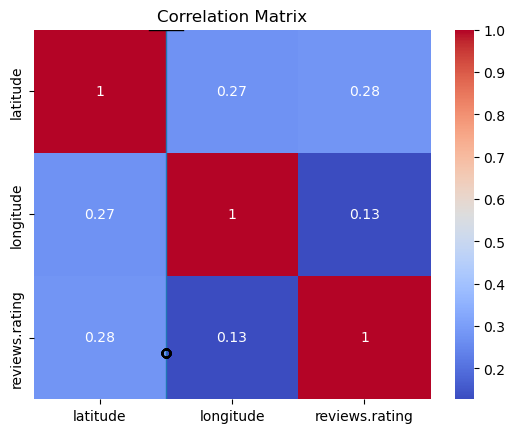

In [85]:
numerical_cols = ["latitude", "longitude", "reviews.rating"]
data_num = data[numerical_cols]

corr_matrix = data_num.corr()

sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

From this heatmap, we can see that there is a weak lower correlation between latitude and reviews.rating, and no significant correlation between longitude and reviews.rating. <a>This suggests that location does not have a strong influence on ratings.</a>

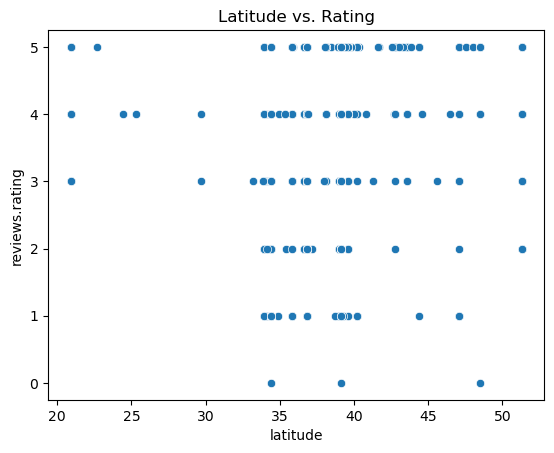

In [86]:
sns.scatterplot(x="latitude", y="reviews.rating", data=data)
plt.title("Latitude vs. Rating")
plt.show()

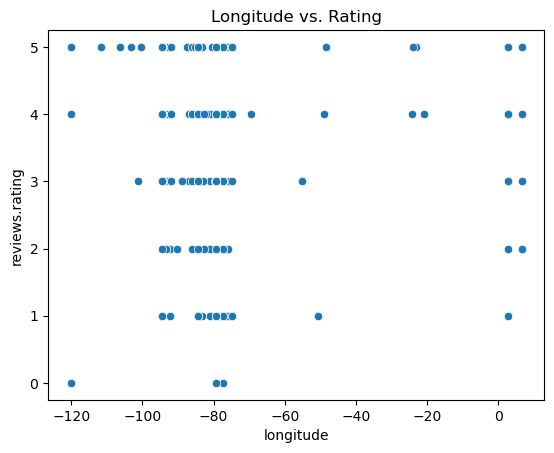

In [87]:
sns.scatterplot(x="longitude", y="reviews.rating", data=data)
plt.title("Longitude vs. Rating")
plt.show()

From these plots, we can see that there is no clear linear relationship between location and ratings.

Overall, <b>our analysis suggests that location does not have a strong influence on ratings.</b> 

<b>Here you can see top 5 proviences by the hotel rating</b>

In [94]:
data_subset = data[['reviews.rating', 'province']]

province_ratings = data_subset.groupby('province')['reviews.rating'].mean()

province_ratings_sorted = province_ratings.sort_values(ascending=False)

print("Top 5 provinces by mean rating:")
province_ratings_sorted.head()

Top 5 provinces by mean rating:


province
WA        4.750000
NJ        4.611940
Onigum    4.475000
MI        4.440000
TX        4.066667
Name: reviews.rating, dtype: float64

<b>This is bottom 5 provinces by mean rating.</b>

In [89]:
print("Bottom 5 provinces by mean rating:")
province_ratings_sorted.tail()

Bottom 5 provinces by mean rating:


province
Upper Holland    3.545455
TN               3.514286
Elkhurst         3.320988
VA               2.849673
SC               1.962264
Name: reviews.rating, dtype: float64

<b>Top 10 hotels with the highest average rating.</b>

In [91]:
data_subset = data[['name', 'province', 'reviews.rating']]

hotel_ratings = data_subset.groupby(['name', 'province'])['reviews.rating'].mean()

hotel_ratings_sorted = hotel_ratings.sort_values(ascending=False)

print("Top 10 hotels with the highest average rating:")
print(hotel_ratings_sorted.head(10))

Top 10 hotels with the highest average rating:
name                                           province             
Americinn Lodge Suites Oscoda - Ausable River  MI                       4.750000
Mt Gardner Inn                                 WA                       4.750000
Gran Melia Victoria                            NJ                       4.611940
Country Inn Walker                             Onigum                   4.475000
Azul Beach Hotel By Karisma Gourmet Inclusive  TX                       4.066667
Osage Village Inn                              MO                       4.062500
Best Western Plus Waterville Grand Hotel       ME                       4.000000
Ocean Breeze Motel Apts                        Lauderdale By The Sea    4.000000
Country Lodge Motel                            MN                       4.000000
Glendale Gaslight Inn                          AZ                       4.000000
Name: reviews.rating, dtype: float64


 <b>Exploting rating by categories</b>

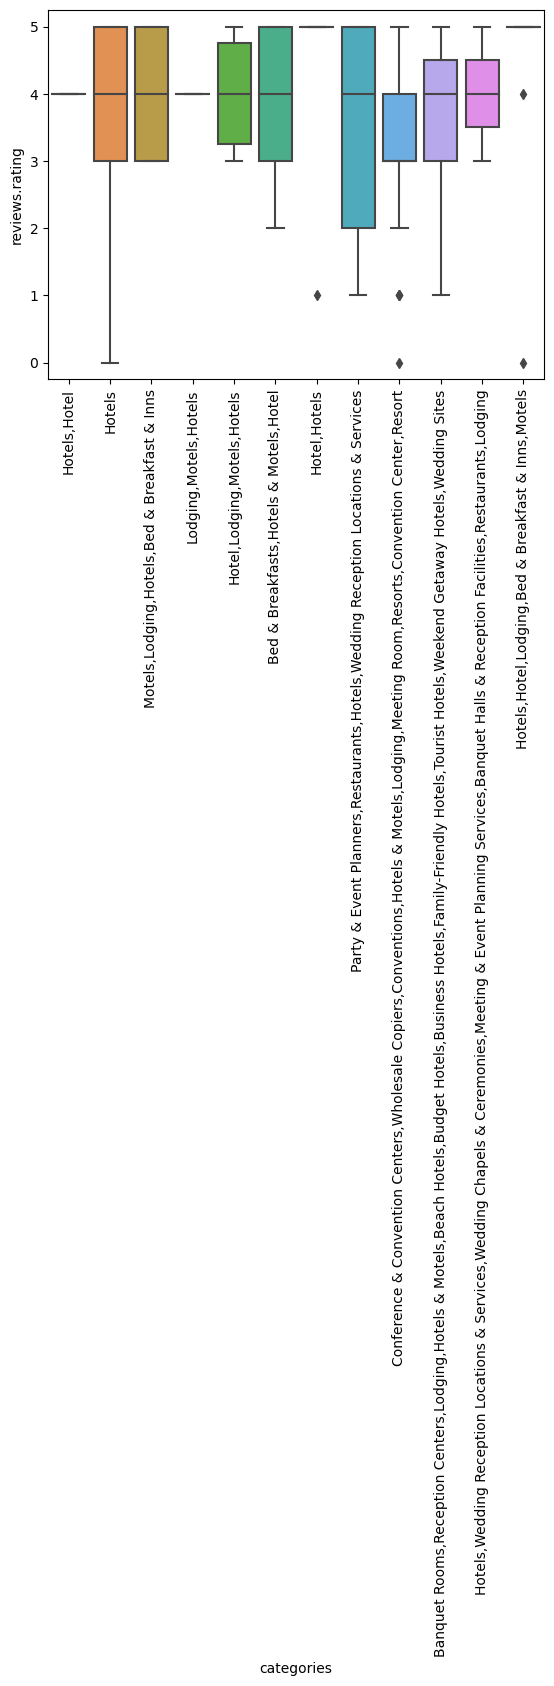

In [95]:
data_subset = data[['reviews.rating', 'categories']]

sns.boxplot(x='categories', y='reviews.rating', data=data_subset)
plt.xticks(rotation=90)
plt.show()

<b>Count of hotel categories</b>

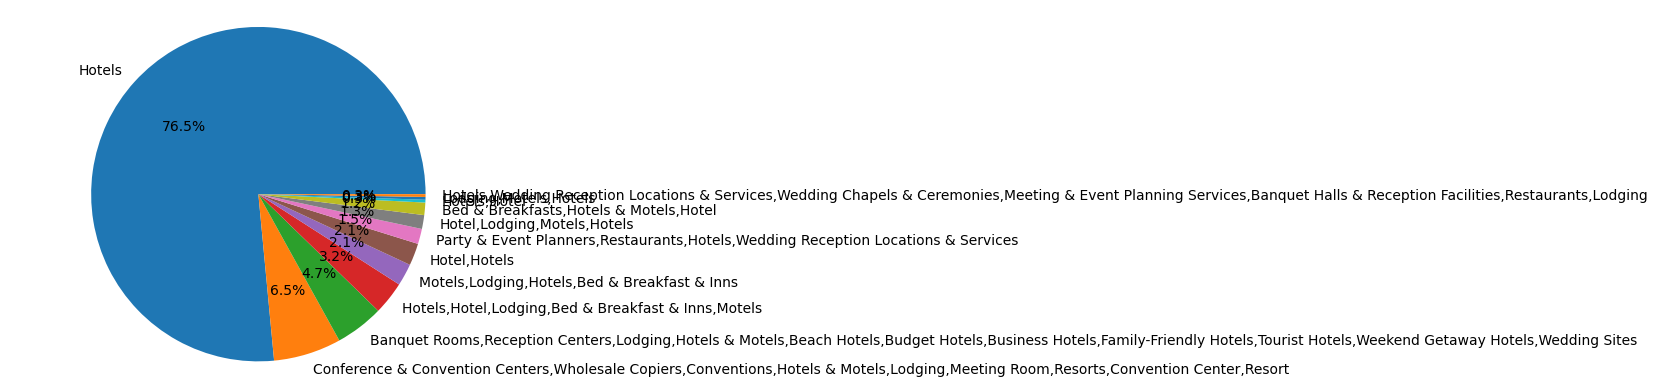

In [96]:
data_subset = data[['categories']]

category_counts = data_subset['categories'].value_counts()

plt.pie(category_counts.values, labels=category_counts.index, autopct='%1.1f%%')
plt.axis('equal')
plt.show()

<b>Count of ratings</b>

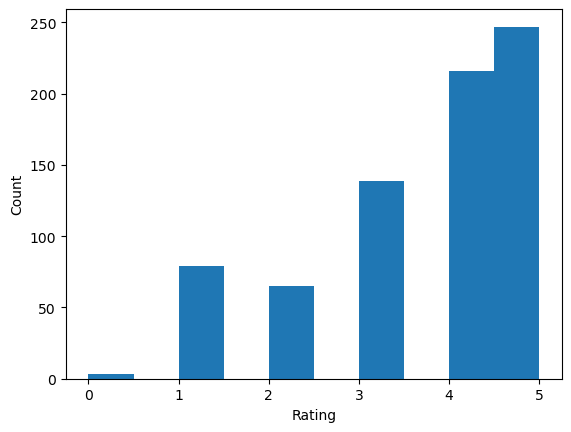

In [97]:
data_subset = data[['reviews.rating']]

plt.hist(data_subset['reviews.rating'], bins=10)
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

<b>Plotting a bar chart of the number of hotels per city</b>

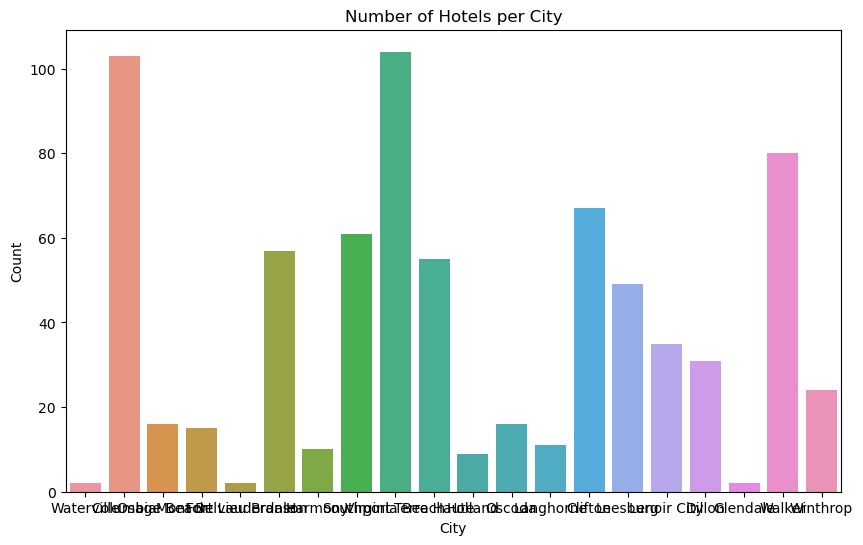

In [99]:
plt.figure(figsize=(10, 6))
sns.countplot(x='city', data=data)
plt.title('Number of Hotels per City')
plt.xlabel('City')
plt.ylabel('Count')
plt.show()

<b>Plotting average rating in the city and affect of category to them</b>

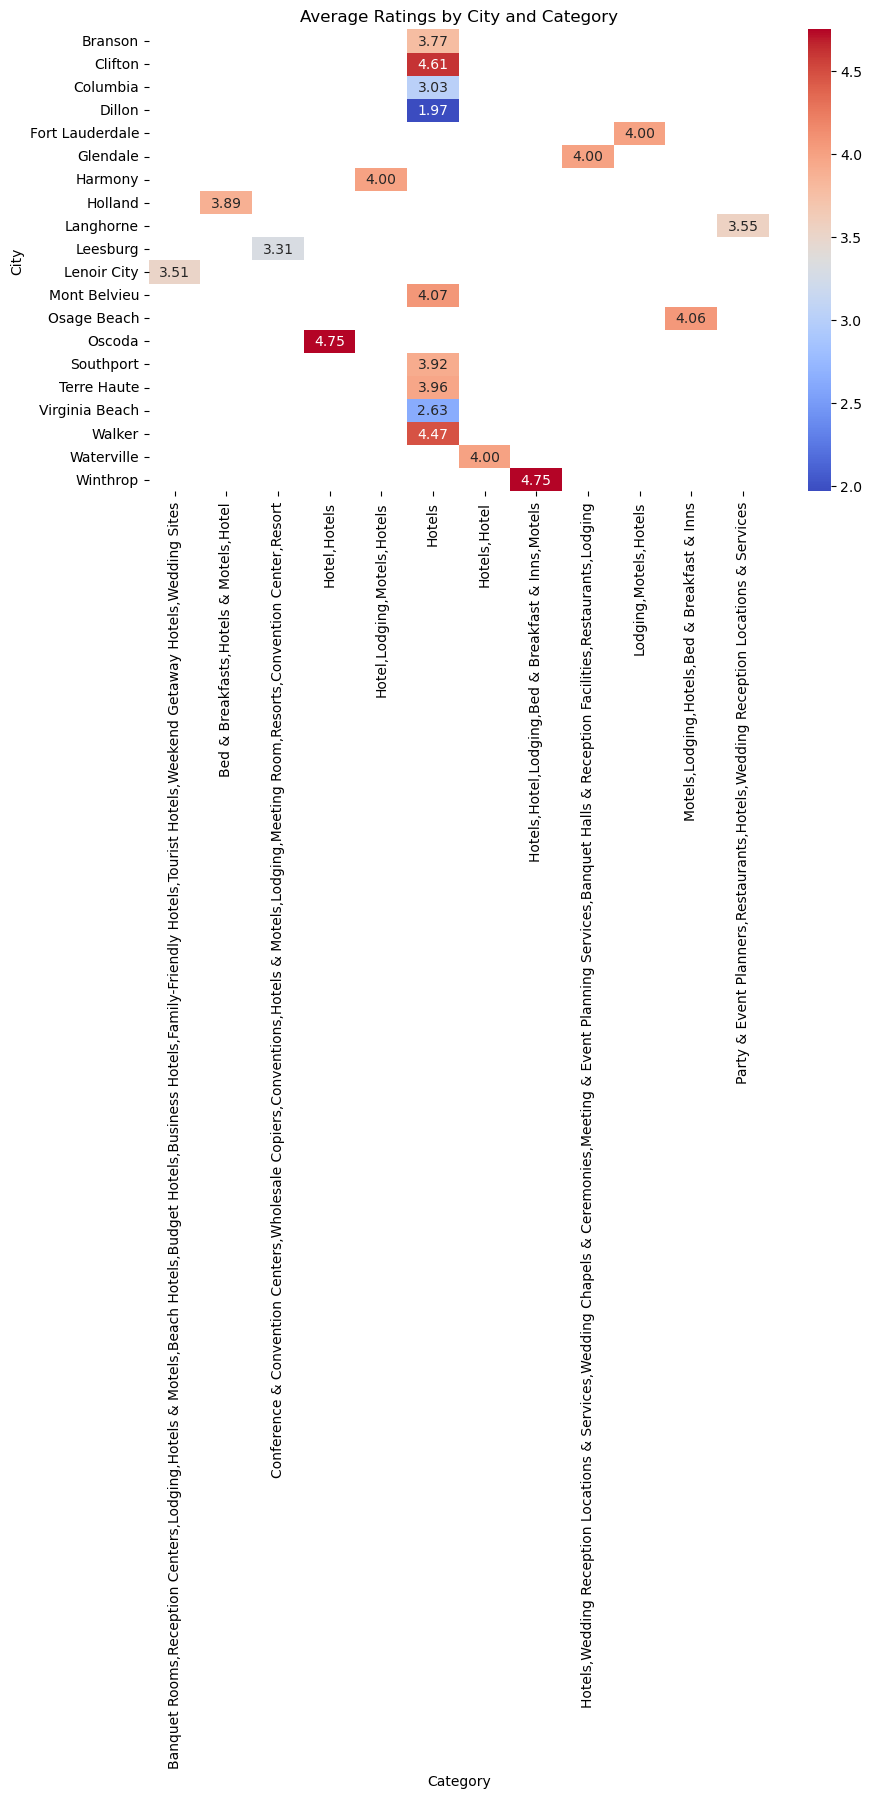

In [100]:
pivot = pd.pivot_table(data, index='city', columns='categories', values='reviews.rating', aggfunc=np.mean)

# Plot a heat map of the pivot table
plt.figure(figsize=(10, 6))
sns.heatmap(pivot, cmap='coolwarm', annot=True, fmt='.2f')
plt.title('Average Ratings by City and Category')
plt.xlabel('Category')
plt.ylabel('City')
plt.show()

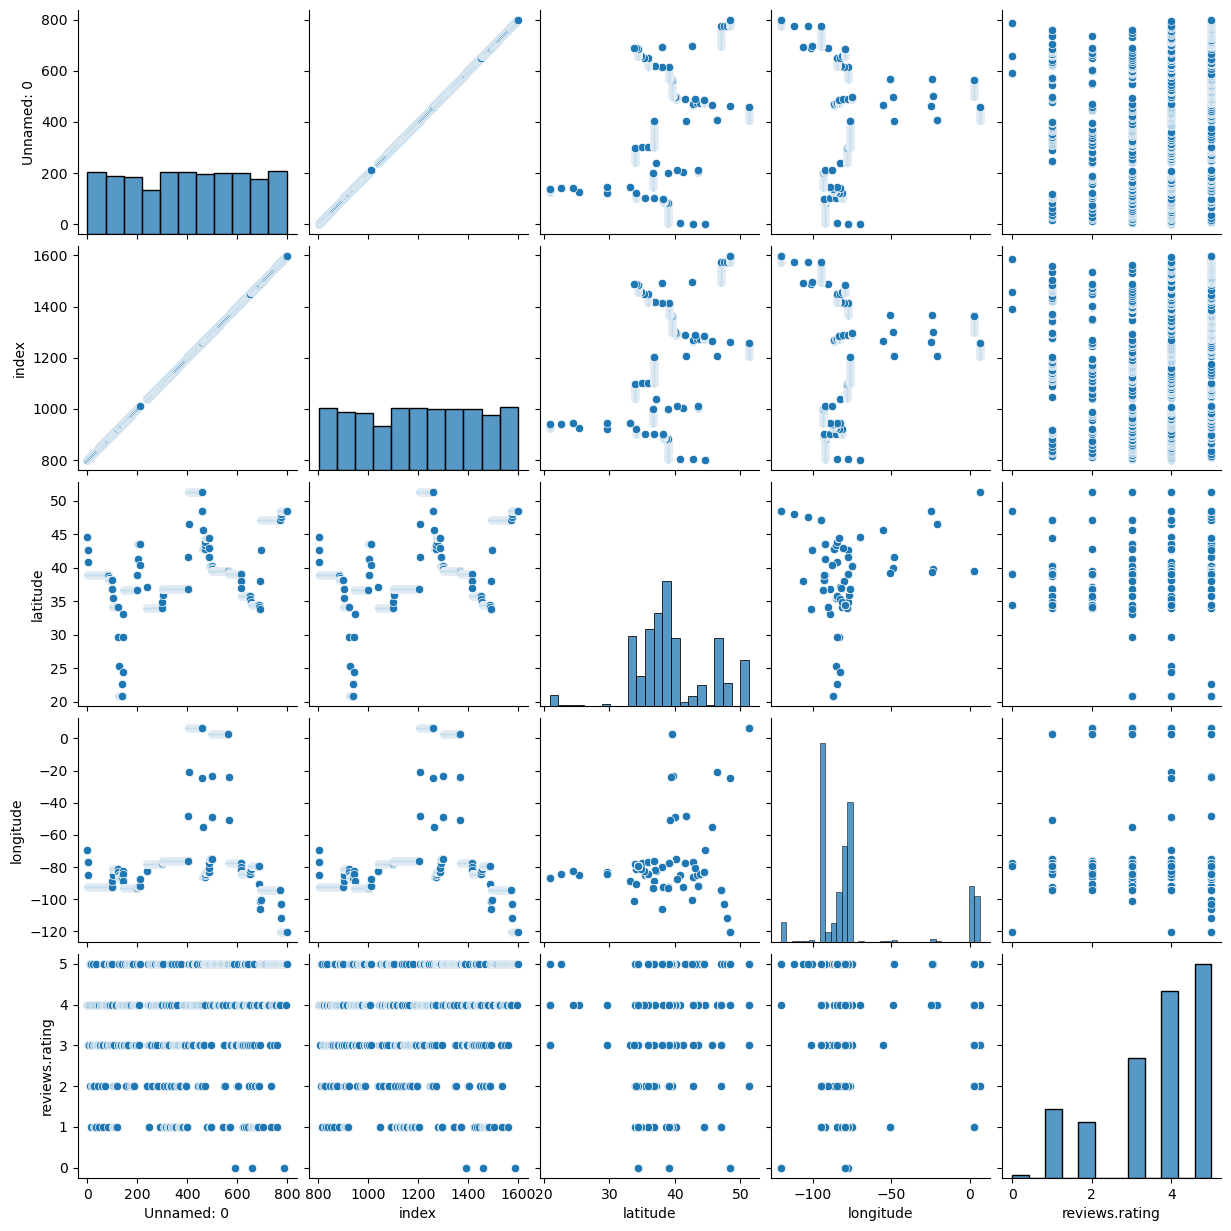

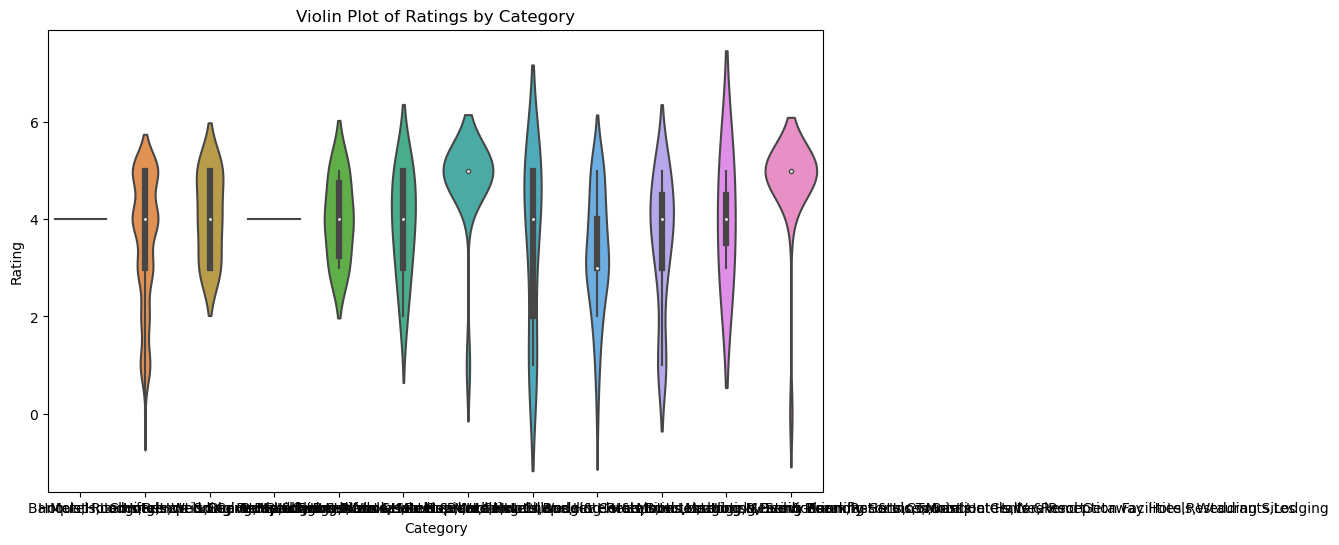

In [101]:
sns.pairplot(data.select_dtypes(include=['float64', 'int64']))
plt.show()

plt.figure(figsize=(10, 6))
sns.violinplot(x='categories', y='reviews.rating', data=data)
plt.title('Violin Plot of Ratings by Category')
plt.xlabel('Category')
plt.ylabel('Rating')
plt.show()

<b> How many hotels we have by postal code?</b>

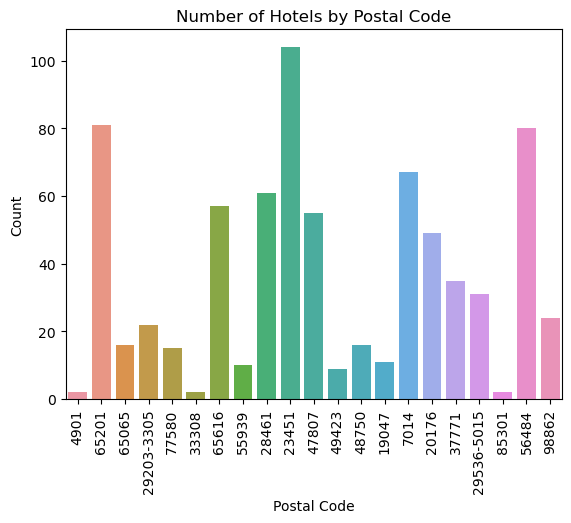

In [103]:
sns.countplot(x='postalCode', data=data)

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Add labels and a title
plt.xlabel('Postal Code')
plt.ylabel('Count')
plt.title('Number of Hotels by Postal Code')

# Show the plot
plt.show()

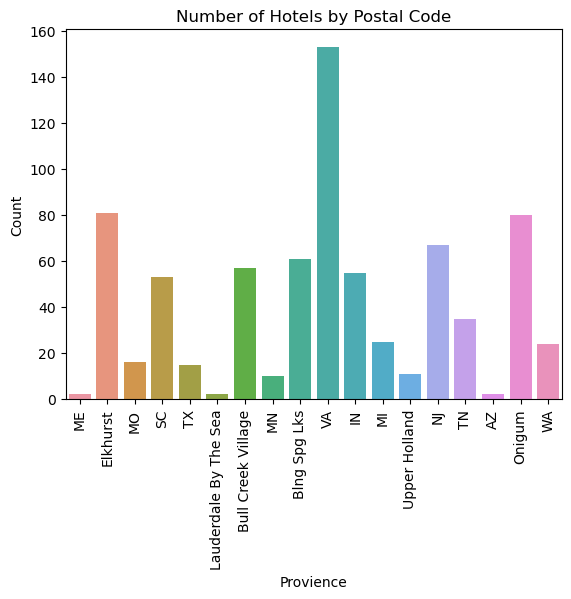

In [120]:
sns.countplot(x='province', data=data)

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Add labels and a title
plt.xlabel('Provience')
plt.ylabel('Count')
plt.title('Number of Hotels by Postal Code')

# Show the plot
plt.show()

<b>Adresses of top 10 hotel by rating</b>

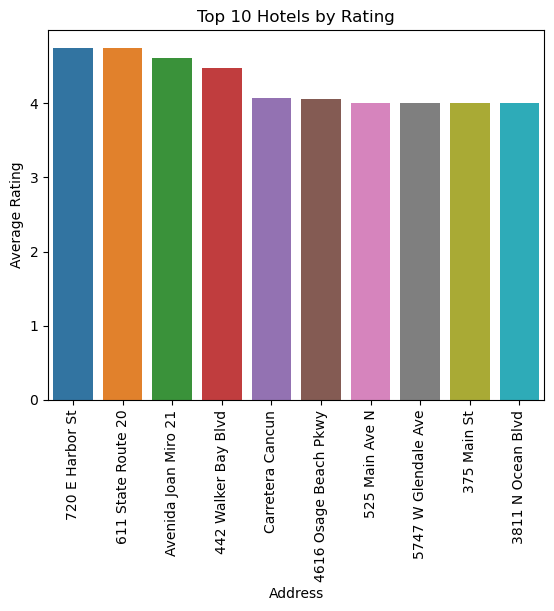

In [104]:
data_grouped = data.groupby('address')['reviews.rating'].mean().reset_index()


data_sorted = data_grouped.sort_values(by='reviews.rating', ascending=False)

sns.barplot(x='address', y='reviews.rating', data=data_sorted.head(10))

plt.xticks(rotation=90)

plt.xlabel('Address')
plt.ylabel('Average Rating')
plt.title('Top 10 Hotels by Rating')

plt.show()

<h1>Conclusion</h1>

In [117]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 749 entries, 1 to 798
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         749 non-null    int64  
 1   index              749 non-null    int64  
 2   address            749 non-null    object 
 3   categories         749 non-null    object 
 4   city               749 non-null    object 
 5   country            749 non-null    object 
 6   latitude           749 non-null    float64
 7   longitude          749 non-null    float64
 8   name               749 non-null    object 
 9   postalCode         749 non-null    object 
 10  province           749 non-null    object 
 11  reviews.date       749 non-null    object 
 12  reviews.dateAdded  749 non-null    object 
 13  reviews.rating     749 non-null    float64
 14  reviews.text       749 non-null    object 
 15  reviews.title      749 non-null    object 
 16  reviews.username   749 non

Based on the analysis of the provided data, the <b>following conclusions can be made</b>:

1. The dataset contains information about 749 hotels, including their location, name, category, and reviews.
2. The majority of hotels are located in the United States, with Virgina having the highest number of hotels.
3. The most common categories of hotels are "Hotels & Motels" and "Lodging".
4. The average rating of hotels in the dataset is 3.7 out of 5, with most hotels having a rating between 4 and 5.
5. The top states for hotel reviews by average rating are Upper Holland, TN, Elkhurst, VA, SC.
6. There is no significant correlation between a hotel's location and the rating of hotel reviews.
7. We alse have a exploration of data about top5 city, average rating per city and so on...

Overall, this dataset provides useful insights into the hotel industry in the United States, and could be used to inform business decisions related to hotel development and marketing strategies. 